In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Load the data
data = pd.read_csv('student_data.csv')

# Prepare the features and target
X = data[['Attendance', 'Performance']]
y = np.where((X['Attendance'] < 70) | (X['Performance'] < 70), 'At Risk', 'Not At Risk')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train_scaled, y_train)

# Make predictions
y_pred = knn.predict(X_test_scaled)

# Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Predict for all students
X_all_scaled = scaler.transform(X)
all_predictions = knn.predict(X_all_scaled)

# Add predictions to the original dataframe
data['Prediction'] = all_predictions

# Display the list of students and their classifications
print("\nStudent Classifications:")
print(data[['Student ID', 'Name', 'Attendance', 'Performance', 'Prediction']])

# Save the results to a CSV file
data.to_csv('student_predictions.csv', index=False)
print("\nResults saved to 'student_predictions.csv'")

Classification Report:
              precision    recall  f1-score   support

     At Risk       0.89      1.00      0.94         8
 Not At Risk       1.00      0.86      0.92         7

    accuracy                           0.93        15
   macro avg       0.94      0.93      0.93        15
weighted avg       0.94      0.93      0.93        15


Confusion Matrix:
[[8 0]
 [1 6]]

Student Classifications:
   Student ID     Name  Attendance  Performance   Prediction
0        S001    David          84           79  Not At Risk
1        S002     Liam          84           73  Not At Risk
2        S003     Jack          58           93      At Risk
3        S004   Oliver          53           73      At Risk
4        S005      Uma          63           99      At Risk
..        ...      ...         ...          ...          ...
70       S071    Tracy          52           98      At Risk
71       S072     Rita          71           78  Not At Risk
72       S073   Oliver          59       

c:\Users\naman\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


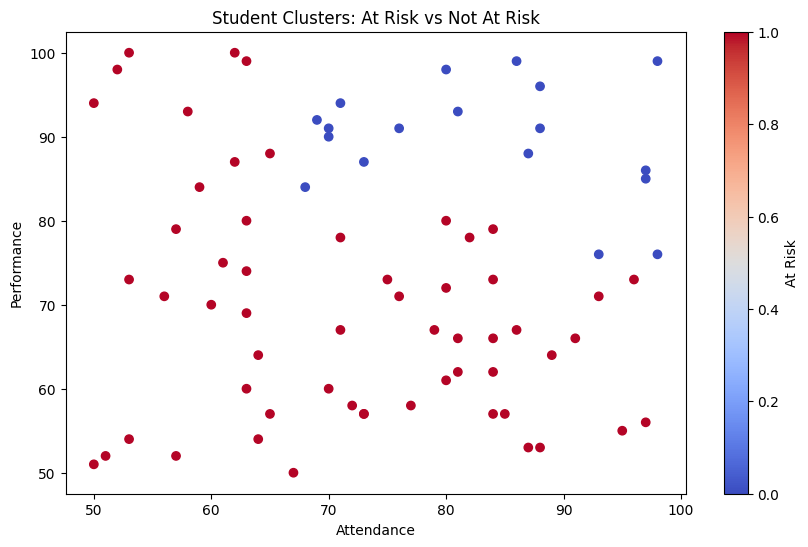

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load the data
data = pd.read_csv('student_data.csv')

# Prepare the features and target
X = data[['Attendance', 'Performance']]
y = np.where((X['Attendance'] < 70) | (X['Performance'] < 75), 'At Risk', 'Not At Risk')

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the KNN model
k = 5  # You can adjust this value
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train_scaled, y_train)

# Predict the classes for all students
X_all_scaled = scaler.transform(X)
predictions = knn.predict(X_all_scaled)

# Add predictions to the original dataframe
data['Predicted_Class'] = predictions

# Plot the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(X['Attendance'], X['Performance'], c=(predictions == 'At Risk'), cmap='coolwarm')
plt.xlabel('Attendance')
plt.ylabel('Performance')
plt.title('Student Clusters: At Risk vs Not At Risk')
plt.colorbar(scatter, label='At Risk')

# Add a decision boundary
x_min, x_max = X['Attendance'].min() - 1, X['Attendance'].max() + 1
y_min, y_max = X['Performance'].min() - 1, X['Performance'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))
Z = knn.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.show()